<a href="https://colab.research.google.com/github/Saniya-Firdous/IIITH_AI-ML_Labs_and_Projects/blob/main/Probabilistic_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probabilistic ML models

Topics:
1. Convolutional Operation
2. CNN and Using Learnt Representations
3. CNN Visualization

#1. Convolutional Operation

Central to Convolutional Neural Networks (CNN), a convolution operation is a linear operation which involves element-wise multiplication between a small filter (say, a matrix of integers) and filter-sized patch from the image. We move this filter across the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image $f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>


Image reference: [Streaming Architecture for Large-Scale Quantized Neural Networks on an FPGA-Based Dataflow Platform](https://www.researchgate.net/publication/318849314_Streaming_Architecture_for_Large-Scale_Quantized_Neural_Networks_on_an_FPGA-Based_Dataflow_Platform/figures?lo=1)

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

Import Libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Padding in Convolution on lotus.jpg

In [11]:
def apply_filter(img, filter, padding='valid'):
    height, width = img.shape
    filter_size = filter.shape

    if padding == 'same':
        # Calculate padding to keep the output size the same as input size
        pad_height = (filter_size[0] - 1) // 2
        pad_width = (filter_size[1] - 1) // 2
        img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    output = np.empty(0)

    # Move the filter over the entire image and store the result in output
    for i in range(0, height - filter_size[0] + 1 + 2 * pad_height):
        for j in range(0, width - filter_size[1] + 1 + 2 * pad_width):
            # Matrix multiplication for a single patch of image and filter
            output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

    # Calculate the output shape of the resultant image
    output_shape = (height + 2 * pad_height - (filter_size[0] - 1)), (width + 2 * pad_width - (filter_size[1] - 1))

    # Return the reshaped image
    return output.reshape(output_shape)

In [12]:
def plot_images(images, titles, tick_params=True):
    n = len(images)
    fig = plt.figure(figsize=(10, 4))
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        if len(images[i].shape) == 2:
            ax.imshow(images[i], cmap='gray', extent=(0, images[i].shape[1], images[i].shape[0], 0))
        else:
            ax.imshow(images[i])
        ax.set_title(titles[i])
        if not tick_params:
            plt.tick_params(axis='both', labelbottom=False, bottom=False, labelleft=False, left=False)
    plt.show()


Upload Image

In [13]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   2672      0  0:00:01  0:00:01 --:--:--  2672


In [14]:
# Load the image from your specified path
image_path = '/content/lotus.jpg'
image = cv2.imread(image_path, 0)  # 0 stands for 'grayscale'

In [15]:
print('Original image size: ', image.shape)

Original image size:  (99, 100)


In [18]:
# 2D image
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])

In [19]:
# Vertical edge filter
filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])


In [20]:
# Example usage with padding='same'
output = apply_filter(img, filter, padding='same')
print(output)


[[-40.  40.  40.   0.   0.]
 [-60.  60.  60.   0.   0.]
 [-60.  60.  60.   0.   0.]
 [-60.  60.  60.   0.   0.]
 [-40.  40.  40.   0.   0.]]


**Convolution Output With Padding : Same**

Output image size:  (99, 100)


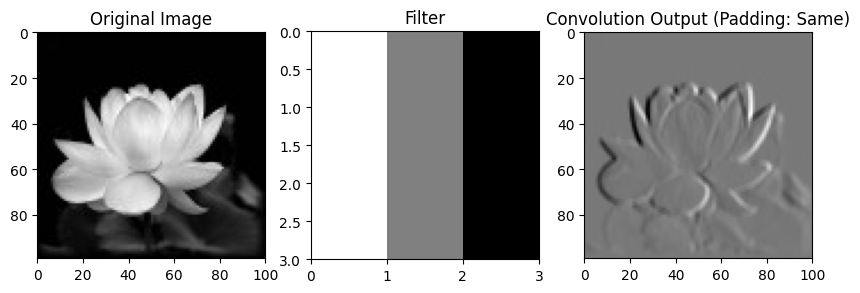

In [21]:
# Example usage with padding='same'
output = apply_filter(image, filter, padding='same')
print('Output image size: ', output.shape)

# Let's plot the images
images = [image, filter, output]
titles = ['Original Image', 'Filter', 'Convolution Output (Padding: Same)']
plot_images(images, titles)

# Stride in Convolution on lotus.jpg

In [22]:
def apply_filter(img, filter, stride=1):
    height, width = img.shape
    filter_size = filter.shape

    output = np.empty(0)

    # Move the filter over the entire image with specified stride and store the result in output
    for i in range(0, height - filter_size[1] + 1, stride):
        for j in range(0, width - filter_size[0] + 1, stride):
            # Matrix multiplication for a single patch of image and filter
            output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

    # Calculate the output shape of the resultant image
    output_shape = ((height - (filter_size[1]-1) - 1) // stride + 1), \
                   ((width - (filter_size[0]-1) - 1) // stride + 1)

    # Return the reshaped image
    return output.reshape(output_shape)

In [23]:
def plot_images(images, titles, tick_params=True):
    n = len(images)
    fig = plt.figure(figsize=(10, 4))
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        if len(images[i].shape) == 2:
            ax.imshow(images[i], cmap='gray', extent=(0, images[i].shape[1], images[i].shape[0], 0))
        else:
            ax.imshow(images[i])
        ax.set_title(titles[i])
        if not tick_params:
            plt.tick_params(axis='both', labelbottom=False, bottom=False, labelleft=False, left=False)
    plt.show()

In [24]:
# Read the image with OpenCV, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

Original image size:  (99, 100)


In [26]:
# Vertical edge filter
filter_vertical = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])

**Convolution Output With Stride**

Output image size with strides:  (49, 49)


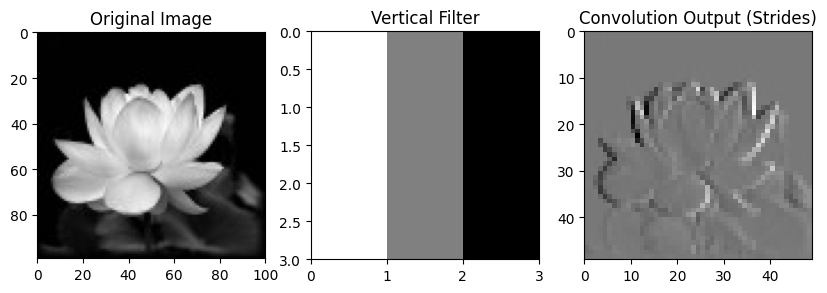

In [28]:
# Applying filter to the image with strides
output = apply_filter(image, filter_vertical, stride=2)
print('Output image size with strides: ', output.shape)

# Let's plot the images
images = [image, filter_vertical, output]
titles = ['Original Image', 'Vertical Filter', 'Convolution Output (Strides)']
plot_images(images, titles)

#2. CNN and Using Learnt Representations

**Q 1: What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.**

Certainly! Let's delve deeper into the calculation and the implications of using a single
5×5 kernel versus an equivalent stack of
3
×
3
 kernels in the context of Convolutional Neural Networks (CNNs).

**Single
5
×
5
 Kernel:**
For a single
5
×
5
kernel in a convolutional layer, the number of parameters is determined by the size of the kernel and the number of input and output channels. The formula for the number of parameters is:

Parameters=Cin
 × Cout
 × 5  × 5

Where:

1. Cin is the number of input channels.
2. Cout is the number of output channels.

This is straightforward: each weight in the 5 x 5 kernel contributes to the total number of parameters.


**Equivalent Stack of 3 × 3 Kernels:**

  Now, consider an equivalent stack of 3 x 3 kernels. Instead of using a single 5 × 5 kernel, we use two 3 × 3 kernels in sequence. The number of parameters for each 3 × 3 kernel is:

Parameters(3x3) = Cin x Cout x 3 x 3

However, since we have two 3 × 3 kernels in sequence, the total number of parameters for the stack is:

Total Parameters Stack = 2 x Parameters(3x3)

Now, let's express the ratio:


Ratio =  Parameters in stacked 3×3 kernels / Parameters in 5×5 kernel

We can simplify this expression further by canceling out common terms:

Ratio = (5 x 5) / (3 x 3 x 2) = 25/18

  Ratio = 25 : 18





#Q.2 replace 7 x 7 convolution kernel using only 3 x 3 kernels

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Load MNIST data

In [30]:
# Load and visualize MNIST training and test datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 190137753.16it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41230665.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 51287330.71it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21772032.88it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [43]:
# Helper function to plot data
def plot_data(images, labels, classes=None):
  figure = plt.figure(figsize=(9, 4))
  cols, rows = 5, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(images), size=(1,)).item()
      img, label = images[sample_idx], labels[sample_idx]
      figure.add_subplot(rows, cols, i)
      if classes is not None:
        label = classes[label]
      plt.title('Label:' +str(label))
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

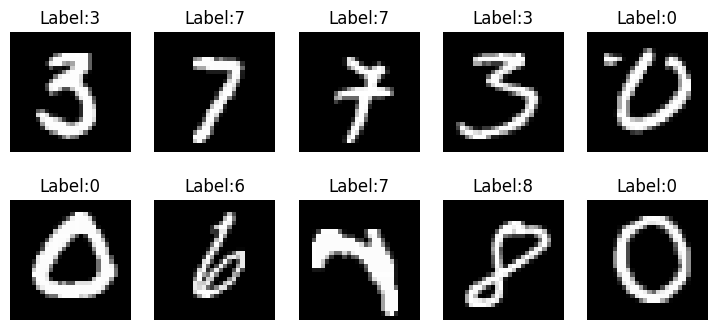

In [45]:
plot_data(train_dataset.data, train_dataset.targets.numpy())

In [32]:
# Define the CNN model with 7x7 kernel
class CNNWith7x7Kernel(nn.Module):
    def __init__(self):
        super(CNNWith7x7Kernel, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=1, padding=3)
        self.fc = nn.Linear(64 * 28 * 28, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [33]:
# Define the CNN model with three consecutive 3x3 kernels
class CNNWith3x3Kernels(nn.Module):
    def __init__(self):
        super(CNNWith3x3Kernels, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(64 * 28 * 28, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [34]:
# Print the models
model_with_7x7_kernel = CNNWith7x7Kernel()
model_with_3x3_kernels = CNNWith3x3Kernels()

print("Model with 7x7 kernel:")
print(model_with_7x7_kernel)

print("\nModel with three 3x3 kernels:")
print(model_with_3x3_kernels)


Model with 7x7 kernel:
CNNWith7x7Kernel(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (fc): Linear(in_features=50176, out_features=10, bias=True)
)

Model with three 3x3 kernels:
CNNWith3x3Kernels(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=50176, out_features=10, bias=True)
)


In [35]:
# Calculate the ratio of parameters
total_params_7x7 = sum(p.numel() for p in model_with_7x7_kernel.parameters())
total_params_3x3 = sum(p.numel() for p in model_with_3x3_kernels.parameters())

print("\nRatio of parameters (7x7 kernel to three 3x3 kernels): {:.2f}".format(total_params_7x7 / total_params_3x3))



Ratio of parameters (7x7 kernel to three 3x3 kernels): 0.88


In [37]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_7x7 = optim.SGD(model_with_7x7_kernel.parameters(), lr=0.01)
optimizer_3x3 = optim.SGD(model_with_3x3_kernels.parameters(), lr=0.01)

In [38]:
def train_model(model, optimizer, criterion, num_epochs=5):
    model.train()
    losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        losses.append(epoch_loss)

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss}")

    return losses

In [39]:
# Train the models and get the losses
losses_7x7 = train_model(model_with_7x7_kernel, optimizer_7x7, criterion)
losses_3x3 = train_model(model_with_3x3_kernels, optimizer_3x3, criterion)

Epoch 1/5, Loss: 0.4353500707094857
Epoch 2/5, Loss: 0.3077639941848926
Epoch 3/5, Loss: 0.29305071864269183
Epoch 4/5, Loss: 0.2847456191219628
Epoch 5/5, Loss: 0.2801480352926229
Epoch 1/5, Loss: 0.3800239247331487
Epoch 2/5, Loss: 0.30746506436515464
Epoch 3/5, Loss: 0.29414598005952863
Epoch 4/5, Loss: 0.28804068943298955
Epoch 5/5, Loss: 0.28240635342943643


In [54]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Put data on devices
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [55]:
def test(model, test_loader):
  # Eval mode
  model.eval()
  test_acc = 0
  correct = 0
  for i, (images, labels) in enumerate(test_loader):
    # Deactivate autograd engine (don't compute grads since we're not training)
    with torch.no_grad():
      images, labels = images.to(device), labels.to(device)
      output = model(images)

      # Calculate number of correct predictions
      _, preds = torch.max(output, dim=1)
      correct += (preds == labels).sum()

  test_acc = correct / len(test_loader.dataset)
  print('Test Accuracy: {:.4f}'.format(test_acc*100))

  # Plot the images with predicted labels
  plot_data(images.data.cpu().numpy(), preds.data.cpu().numpy(), test_loader.dataset.classes)

In [46]:
# Evaluate the network on the test data
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print("Accuracy on test data: {:.2%}".format(accuracy))


In [59]:
# Evaluate the models
evaluate_model(model_with_7x7_kernel)
evaluate_model(model_with_3x3_kernels)

Accuracy on test data: 91.42%
Accuracy on test data: 92.30%


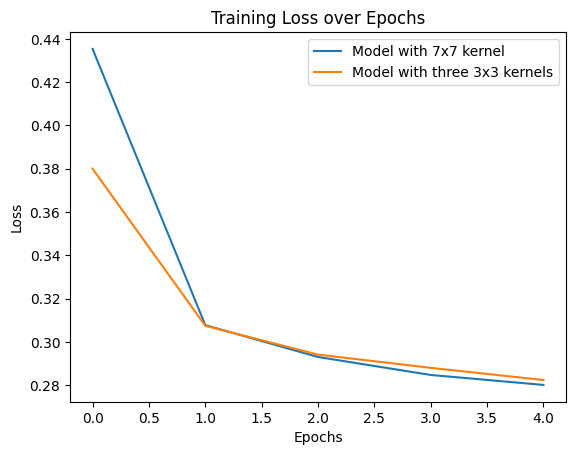

In [60]:
# Plot the losses
plt.plot(losses_7x7, label='Model with 7x7 kernel')
plt.plot(losses_3x3, label='Model with three 3x3 kernels')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss over Epochs')
plt.show()

#3. CNN Visualization

#  Practical Applications of Convolutional Autoencoders

Convolutional autoencoders have various practical applications in computer vision and image processing. Some of the notable applications include:

1. **Image Denoising:**
  
  Convolutional autoencoders can be used for image denoising by training the model to remove noise from corrupted images. The network learns to encode the clean structure of images while filtering out unwanted noise during the encoding process.

2. **Anomaly Detection:**
  
  Convolutional autoencoders are effective in detecting anomalies or outliers in images. By training on a dataset of normal images, the autoencoder can learn to reconstruct normal patterns. Anomalies are detected when the model struggles to reconstruct unfamiliar or anomalous patterns.

3. **Image Generation and Synthesis:**
  
  Convolutional autoencoders can generate new images by sampling from the learned latent space. This is particularly useful for generating realistic images or creating variations of existing images.

4. **Image Compression:**
  
  Autoencoders, including convolutional variants, can be used for image compression. The encoder compresses the input image into a lower-dimensional representation (latent space), and the decoder reconstructs the image from this representation. This compression can be useful in scenarios with limited storage or bandwidth.

5. **Feature Extraction:**
  
  The encoder part of a convolutional autoencoder can serve as a feature extractor. By using the learned features from the encoder, these models can be employed for various downstream tasks such as image classification or segmentation.

6. **Super-Resolution:**
  
  Convolutional autoencoders can be used for super-resolution tasks by training on low-resolution and high-resolution pairs. The model learns to generate high-resolution images from low-resolution inputs, which is useful in enhancing image quality.

7. **Style Transfer:**
  
  By manipulating the latent space or embedding, convolutional autoencoders can be used for artistic style transfer. This involves applying the style of one image to the content of another, creating visually appealing and stylized results.

8. **Medical Image Analysis:**
  
  Convolutional autoencoders find applications in medical image analysis, such as denoising medical images, detecting abnormalities, and generating synthetic medical images for training machine learning models without privacy concerns.

9. **Video Compression:**
  
  Similar to image compression, convolutional autoencoders can be applied to video data, compressing and reconstructing video frames. This is beneficial in scenarios where bandwidth is limited.

10. **Semantic Segmentation:**
  
  The encoder part of convolutional autoencoders can be employed for semantic segmentation tasks, providing meaningful feature representations for each pixel in an image.

#Change we need to make for the autoencoder to reduce into PCA:

To make an autoencoder function similarly to Principal Component Analysis (PCA), you need to introduce certain constraints in the architecture and training process. Here are the key changes to make an autoencoder more PCA-like:

1. **Linear Activation Function:**
  
  Use linear activation functions (e.g., identity function) in both the encoder and decoder. This ensures that the output of the autoencoder is a linear transformation of the input, similar to how PCA performs a linear transformation.

2. **Mean Squared Error (MSE) Loss:**
  
  Use Mean Squared Error as the loss function during training. MSE loss encourages the autoencoder to minimize the reconstruction error, making the output closely resemble the input data.

3. **Orthogonal Encoder Weights:**
  
  Encourage orthogonality in the weights of the encoder. This helps in ensuring that the learned features are uncorrelated, which aligns with the goal of PCA.

4. **Dimensionality Reduction:**
  
  Set the dimensionality of the latent space (embedding) to be equal to the desired number of principal components. This forces the autoencoder to learn a low-dimensional representation similar to the principal components extracted by PCA.

5. **Normalization:**
  
  Normalize the input data to have zero mean and unit variance. This is a common preprocessing step in PCA, and it helps in achieving consistency with the behavior of PCA.

6. **Whitening:**
  
  Apply whitening to the latent space representations. Whitening involves decorrelating the features and normalizing them. While not always necessary, it can enhance the PCA-like behavior of the autoencoder.

In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [109]:

# Define a simple autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, encoding_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [118]:
# Define your autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate your autoencoder model
autoencoder = Autoencoder()

# Print the model architecture
print(autoencoder)

# Extract convolutional layers
conv_layers = [layer for layer in autoencoder.modules() if isinstance(layer, nn.Conv2d)]

# Print the convolutional layers
print("Convolutional Layers:")
for i, conv_layer in enumerate(conv_layers, 1):
    print(f"Convolutional Layer {i}:\n{conv_layer}\n")

# Check the total number of convolutional layers
print(f"Total convolutional layers: {len(conv_layers)}")


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): Sigmoid()
  )
)
Convolutional Layers:
Convolutional Layer 1:
Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

Convolutional Layer 2:
Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

Total convolutional layers: 2


In [120]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

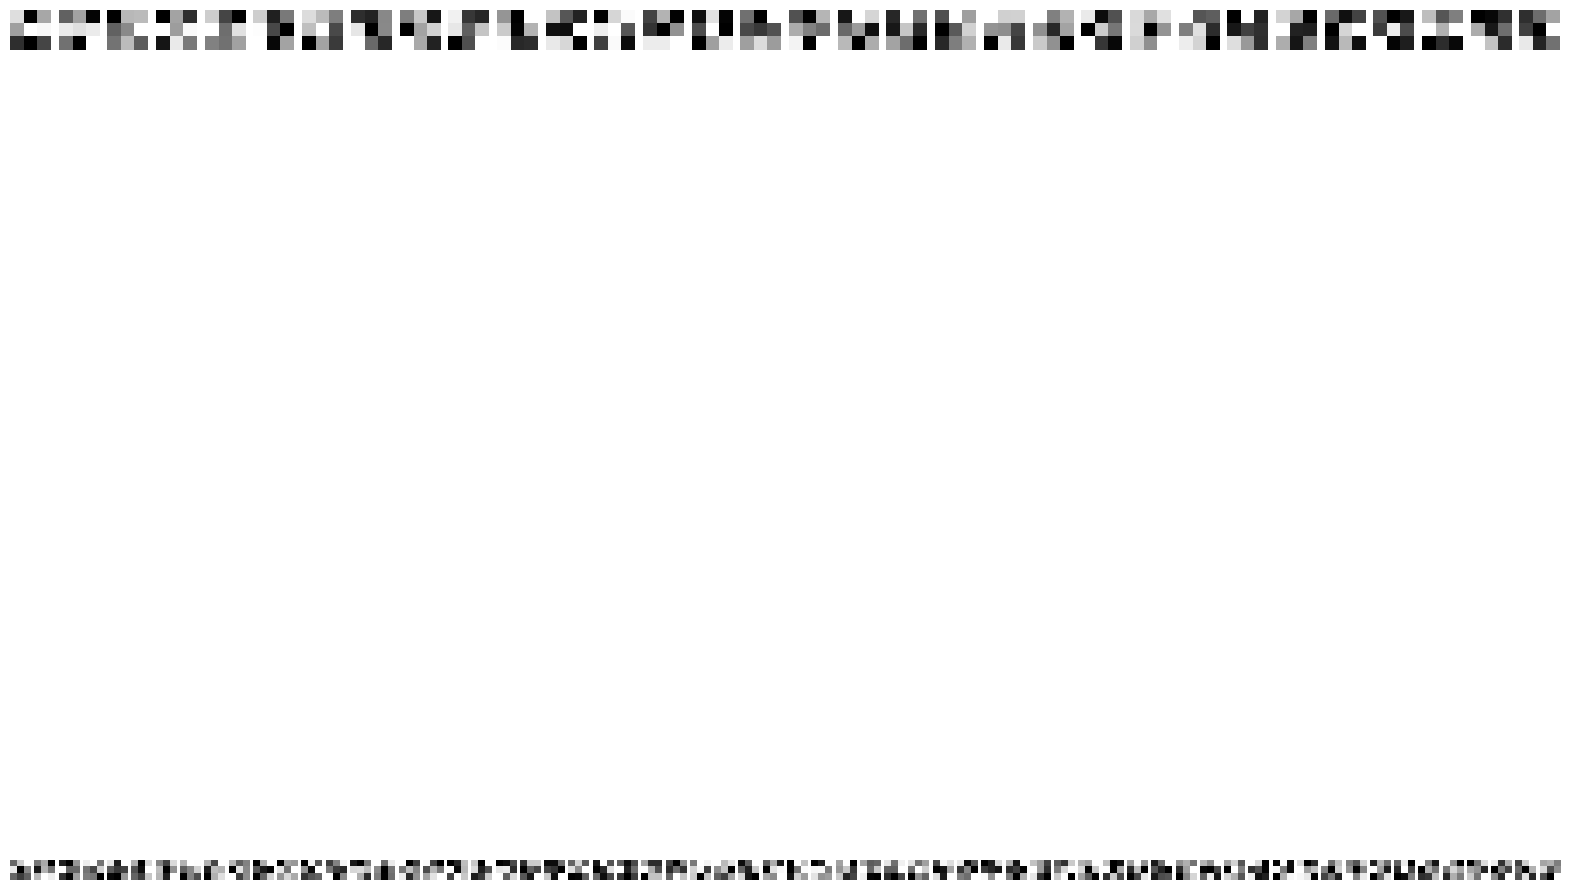

In [127]:
# Get the weights of the convolutional layers
conv_weights = [conv.weight.data.cpu().numpy() for conv in autoencoder.encoder if isinstance(conv, nn.Conv2d)]

# Visualize the conv layer filters
plt.figure(figsize=(20, 20))
for i, filters in enumerate(conv_weights):
    for j, filter in enumerate(filters):
        plt.subplot(len(conv_weights), len(filters), i * len(filters) + j + 1)
        plt.imshow(filter[0, :, :], cmap='gray')
        plt.axis('off')
plt.show()
